In [34]:
set.seed(1234)

In [35]:
a <- 1; b <- 15; c <- 10

In [36]:
t <- seq(1,20)
t

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [37]:
#標準正規分布に従うような数を引数n個分生成する
e <- rnorm(20)/2
e

[1] -0.60353287  0.13871462  0.54222059 -1.17284885  0.21456234  0.25302795
 [7] -0.28736998 -0.27331593 -0.28222600 -0.44501891 -0.23859635 -0.49919322
[13] -0.38812695  0.03222941  0.47974703 -0.05514275 -0.25550475 -0.45559771
[19] -0.41858584  1.20791759

In [38]:
#numpyのブロードキャスト的な
c+e

[1]  9.396467 10.138715 10.542221  8.827151 10.214562 10.253028  9.712630
 [8]  9.726684  9.717774  9.554981  9.761404  9.500807  9.611873 10.032229
[15] 10.479747  9.944857  9.744495  9.544402  9.581414 11.207918

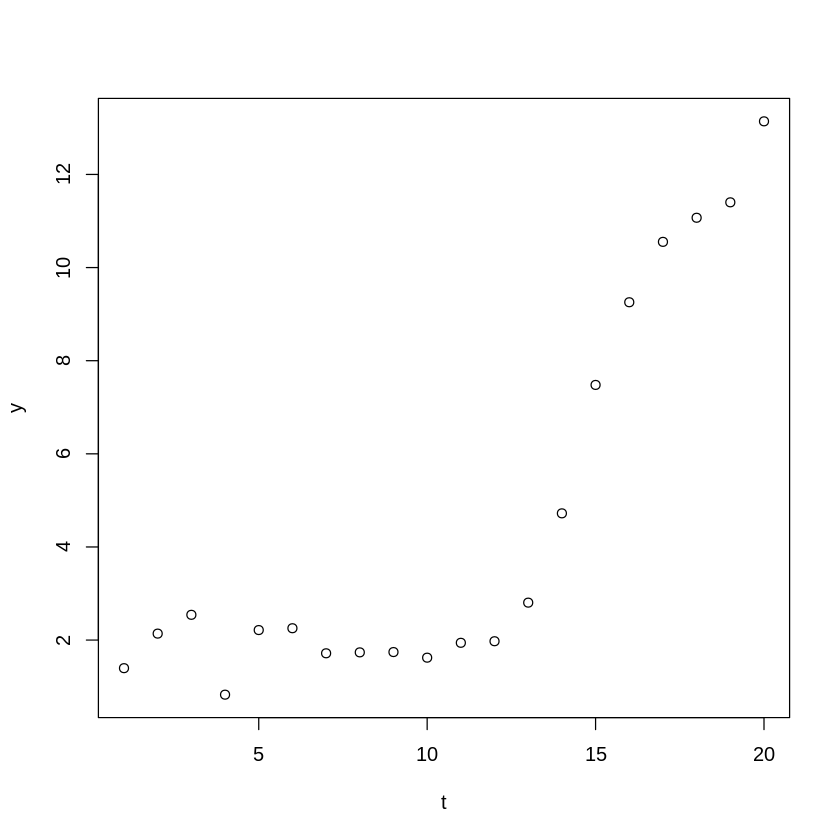

In [39]:
#Original equation
y <- c/(1+exp(-a*t+b)) + e + 2
plot(t, y)

# 反復する方法で予測を行う

In [21]:
for(n in 0:10){
    c <- ceiling(max(y)) + n
    yy <- log((c-y)/y)
    res <- lm(yy~t)
    cat("c value=", c, "\n") 
    print(summary(res)$coefficients)
    print(summary(res)$adj.r.squared)
    }

c value= 14 
              Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  3.2137817 0.38834623  8.275558 1.507965e-07
t           -0.2220355 0.03241852 -6.849034 2.077257e-06
[1] 0.7072837
c value= 15 
              Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  3.1734396 0.34736766  9.135679 3.522750e-08
t           -0.2033486 0.02899769 -7.012580 1.516589e-06
[1] 0.7171621
c value= 16 
              Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  3.1749288 0.32538082  9.757578 1.301164e-08
t           -0.1918618 0.02716227 -7.063542 1.376001e-06
[1] 0.7201504
c value= 17 
             Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  3.192506 0.31054888 10.280203 5.827375e-09
t           -0.183646 0.02592412 -7.083982 1.323474e-06
[1] 0.7213374
c value= 18 
              Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  3.2179165 0.29955342 10.742379 2.934325e-09
t           -0.1773532 0.02500624 -7.092359 1.302555e-06
[1] 0.7218218
c value= 19 


In [22]:
res


Call:
lm(formula = yy ~ t)

Coefficients:
(Intercept)            t  
      3.411       -0.157  


In [23]:
summary(res)
#Residuals : 残差ε
#Coefficients : 係数
##SE, Std. Error : 標準誤差σ/√n．　母集団からある数の標本を選ぶとき，　
#                                             選ぶ際の組み合わせによって統計量がどの程度ばらつくか全ての組み合わせについての標準偏差で表したもの
#                                             標本から得られる推定量のばらつき．　一般的に標本平均の標準偏差を表す→中心極限定理よりσ/√n = √(σ^2/n)


Call:
lm(formula = yy ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8070 -0.4404 -0.2330  0.5494  0.8846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.41106    0.26549  12.848 1.67e-10 ***
t           -0.15700    0.02216  -7.084 1.32e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5715 on 18 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7214 
F-statistic: 50.19 on 1 and 18 DF,  p-value: 1.323e-06


# 直接予測する(反復する方法を使わない)

In [29]:
cbind(t,y)

t,y
1,1.3964754
2,2.1387372
3,2.5422820
4,0.8273182
5,2.2150163
6,2.2542619
7,1.7159835
8,1.7357946
9,1.7425002
10,1.6219096


In [30]:
#データフレームとはdata.frame()クラスを持つリスト，　ただし列名と行名を持つ
#cbind()は行列の生成を行う関数
dat <- data.frame(cbind(t,y))

In [32]:
#Nonlinear least squares
res.nls <- nls(y~c/(1+exp(-a*t+b))+d, dat, start=list(a=1, b=10, c=10, d=1))
summary(res.nls)


Formula: y ~ c/(1 + exp(-a * t + b)) + d

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a   0.9483     0.1363   6.956 3.23e-06 ***
b  14.2049     1.9953   7.119 2.43e-06 ***
c  10.3935     0.4490  23.146 9.95e-14 ***
d   1.7550     0.1648  10.648 1.14e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5315 on 16 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 3.208e-06


# 結果 : 最小二乗法を用いた線形回帰を繰り返してパラメータを推定するより，　非線形最小二乗法を用いた方が精度が良い